In [3]:
import time

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Project : Solar Panel Power Prediction

link : https://www.kaggle.com/datasets/vipulgote4/solar-power-generation

In [4]:
df = pd.read_csv('./ml_dataset.csv')

## Part 1 : Data Preparation

In [5]:
df.isnull().sum()

Day of Year                             0
Year                                    0
Month                                   0
Day                                     0
First Hour of Period                    0
Is Daylight                             0
Distance to Solar Noon                  0
Average Temperature (Day)               0
Average Wind Direction (Day)            0
Average Wind Speed (Day)                0
Sky Cover                               0
Visibility                              0
Relative Humidity                       0
Average Wind Speed (Period)             1
Average Barometric Pressure (Period)    0
Power Generated                         0
dtype: int64

At first glance, the data appears to be almost clean. The column names are easy to understand. We just have one missing data item in one row for one column. We can therefore ignore this row by deleting it.

In [6]:
df = df[df['Average Wind Speed (Period)'].notna()]

In [7]:
df.isnull().sum()

Day of Year                             0
Year                                    0
Month                                   0
Day                                     0
First Hour of Period                    0
Is Daylight                             0
Distance to Solar Noon                  0
Average Temperature (Day)               0
Average Wind Direction (Day)            0
Average Wind Speed (Day)                0
Sky Cover                               0
Visibility                              0
Relative Humidity                       0
Average Wind Speed (Period)             0
Average Barometric Pressure (Period)    0
Power Generated                         0
dtype: int64

In [8]:
df.head()

,Day of Year,Year,Month,Day,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
0,245,2008,9,1,1,False,0.86,69,28,7.50,0,10.00,75,8.00,29.82,0
1,245,2008,9,1,4,False,0.63,69,28,7.50,0,10.00,77,5.00,29.85,0
2,245,2008,9,1,7,True,0.40,69,28,7.50,0,10.00,70,0.00,29.89,5418
3,245,2008,9,1,10,True,0.17,69,28,7.50,0,10.00,33,0.00,29.91,25477
4,245,2008,9,1,13,True,0.07,69,28,7.50,0,10.00,21,3.00,29.89,30069


We can also see that there are columns with values that could be combined, such as date.

In [9]:
df.insert(0, 'Date', pd.to_datetime(
    dict(year=df.Year, month=df.Month, day=df.Day)
))
df.drop(columns=['Day of Year','Year', 'Month', 'Day'], inplace=True)

In [10]:
df.describe()

,Date,First Hour of Period,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
count,2919,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00
mean,2009-03-02 00:45:52.723535360,11.50,0.50,58.47,24.96,10.10,1.99,9.56,73.51,10.13,30.02,6982.18
min,2008-09-01 00:00:00,1.00,0.05,42.00,1.00,1.10,0.00,0.00,14.00,0.00,29.48,0.00
25%,2008-12-01 00:00:00,5.50,0.23,53.00,25.00,6.60,1.00,10.00,65.00,5.00,29.92,0.00
50%,2009-03-02 00:00:00,13.00,0.48,59.00,27.00,10.00,2.00,10.00,77.00,9.00,30.00,404.00
75%,2009-06-01 00:00:00,17.50,0.74,63.00,29.00,13.10,3.00,10.00,84.00,15.00,30.11,12725.00
max,2009-08-31 00:00:00,22.00,1.14,78.00,36.00,26.60,4.00,10.00,100.00,40.00,30.53,36580.00
std,NaN,6.88,0.30,6.84,6.91,4.84,1.41,1.38,15.07,7.26,0.14,10313.33


As can be seen from the table above, there are no outliers. However, if we look at the temperature column, the values seem high to be in degrees. We therefore need to convert the fahrenheit values to celsius degrees.

In [11]:
def f(x):
    x = (x -32)*(5/9)
    return float(x)

df['Average Temperature (Day)'] = df['Average Temperature (Day)'].apply(f)
df['Average Temperature (Day)']

0      20.56
1      20.56
2      20.56
3      20.56
4      20.56
        ... 
2915   17.22
2916   17.22
2917   17.22
2918   17.22
2919   17.22
Name: Average Temperature (Day), Length: 2919, dtype: float64

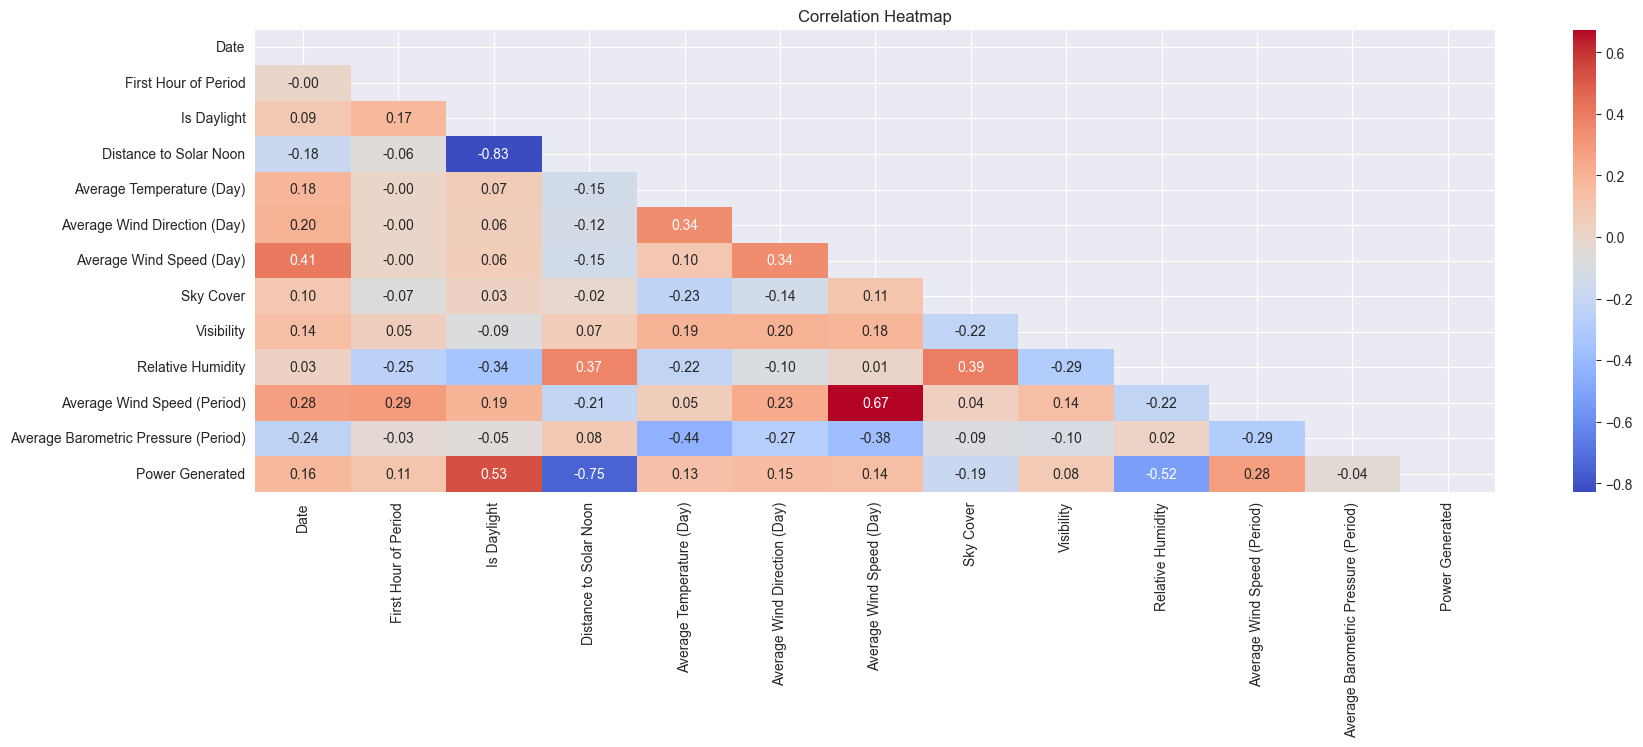

In [12]:
corr = df.corr()

plt.figure(figsize=(20, 6))
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, mask=mask)

ax.set_title('Correlation Heatmap')

plt.show()

Following this Correlation Heatmap, we can see that two columns are very correlated, "Is Daylight" and "Distance to Solar Noon". According to us, "Is Daylight" values are to approximate, so we will drop "Is Daylight" columns.

In [13]:
df.drop(columns=['Is Daylight'], inplace=True)

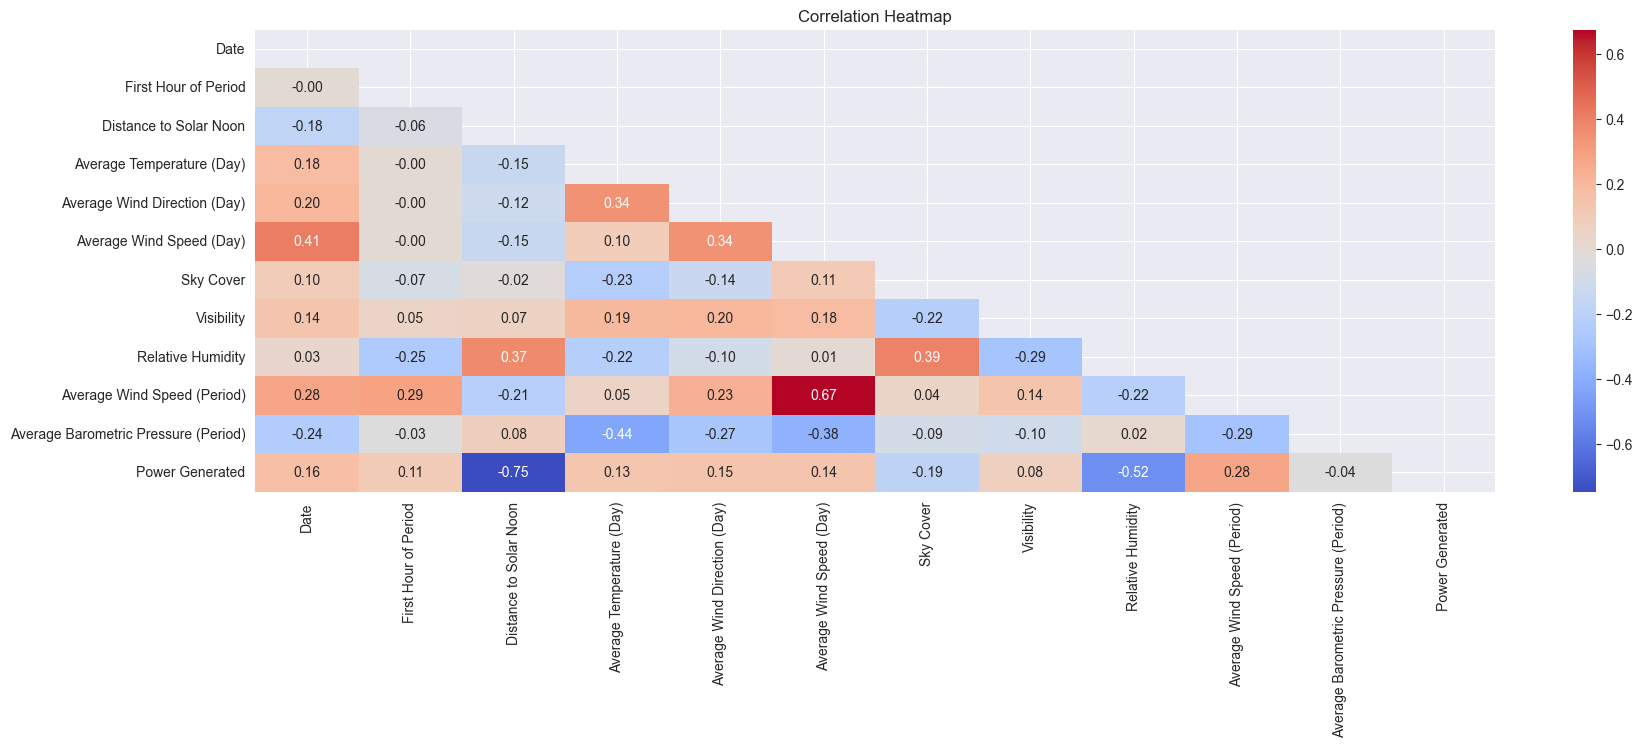

In [14]:
corr = df.corr()

plt.figure(figsize=(20, 6))
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, mask=mask)

ax.set_title('Correlation Heatmap')

plt.show()

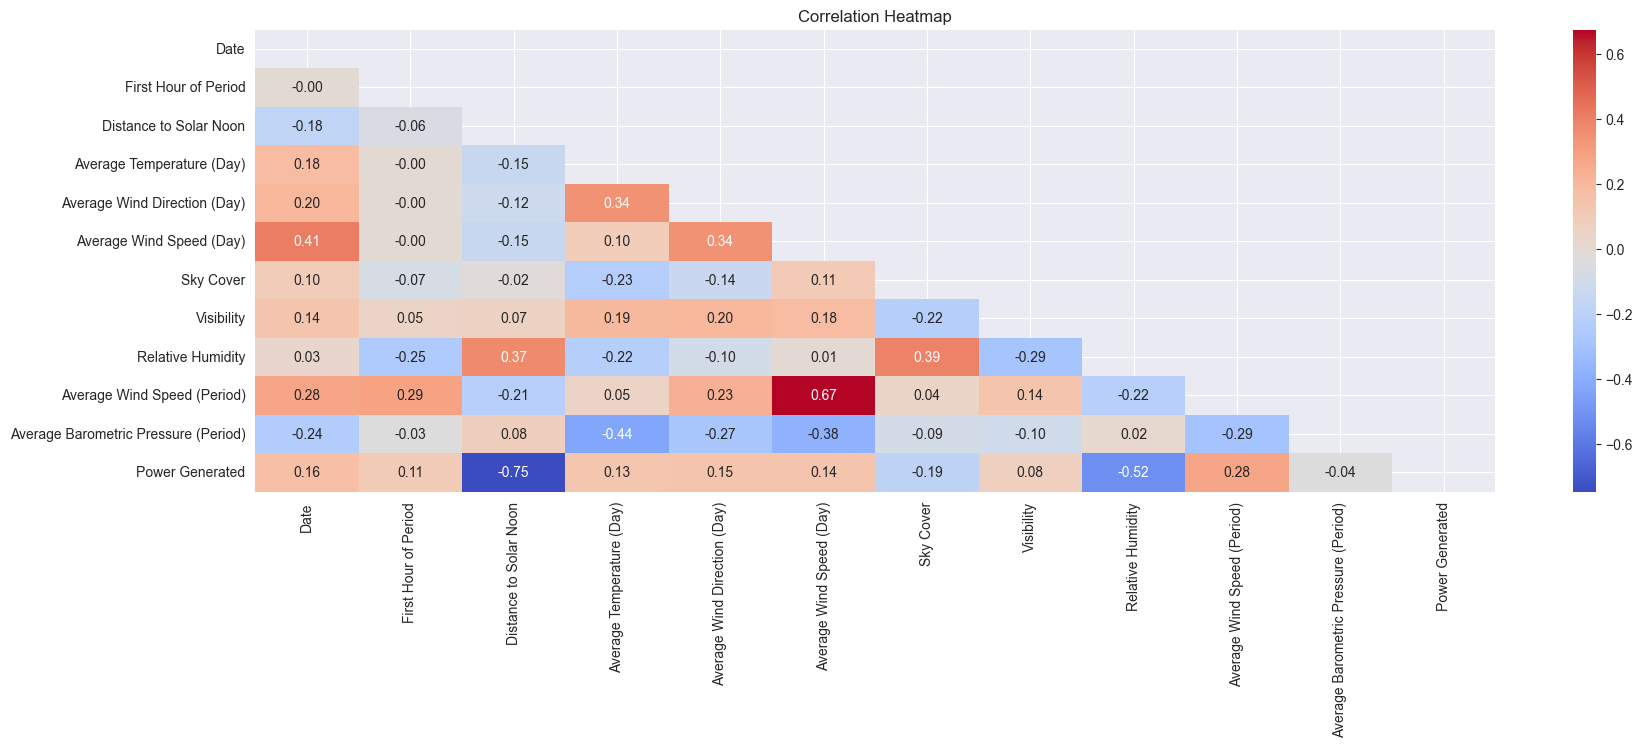

In [15]:
corr = df.corr()

plt.figure(figsize=(20, 6))
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, mask=mask)

ax.set_title('Correlation Heatmap')

plt.show()

In addition, "Distance to Solar Noon" seems, one again, to correlate with "Power Generated". But **"Power Generated"** is our **target** and "Distance to Solar Noon" could be significant for our study so we will keep both.

In [16]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,2919,2009-03-02 00:45:52.723535360,2008-09-01 00:00:00,2008-12-01 00:00:00,2009-03-02 00:00:00,2009-06-01 00:00:00,2009-08-31 00:00:00,NaN
First Hour of Period,2919.00,11.50,1.00,5.50,13.00,17.50,22.00,6.88
Distance to Solar Noon,2919.00,0.50,0.05,0.23,0.48,0.74,1.14,0.30
Average Temperature (Day),2919.00,14.70,5.56,11.67,15.00,17.22,25.56,3.80
Average Wind Direction (Day),2919.00,24.96,1.00,25.00,27.00,29.00,36.00,6.91
Average Wind Speed (Day),2919.00,10.10,1.10,6.60,10.00,13.10,26.60,4.84
Sky Cover,2919.00,1.99,0.00,1.00,2.00,3.00,4.00,1.41
Visibility,2919.00,9.56,0.00,10.00,10.00,10.00,10.00,1.38
Relative Humidity,2919.00,73.51,14.00,65.00,77.00,84.00,100.00,15.07
Average Wind Speed (Period),2919.00,10.13,0.00,5.00,9.00,15.00,40.00,7.26


For the moment, based on the correlation matrix and the values we have, only the pressure column seems useless. So we intend to keep the others.

In [17]:
df.drop(columns=['Average Barometric Pressure (Period)'], inplace=True)

# Part 2 : Data Visualisation about our Dataset

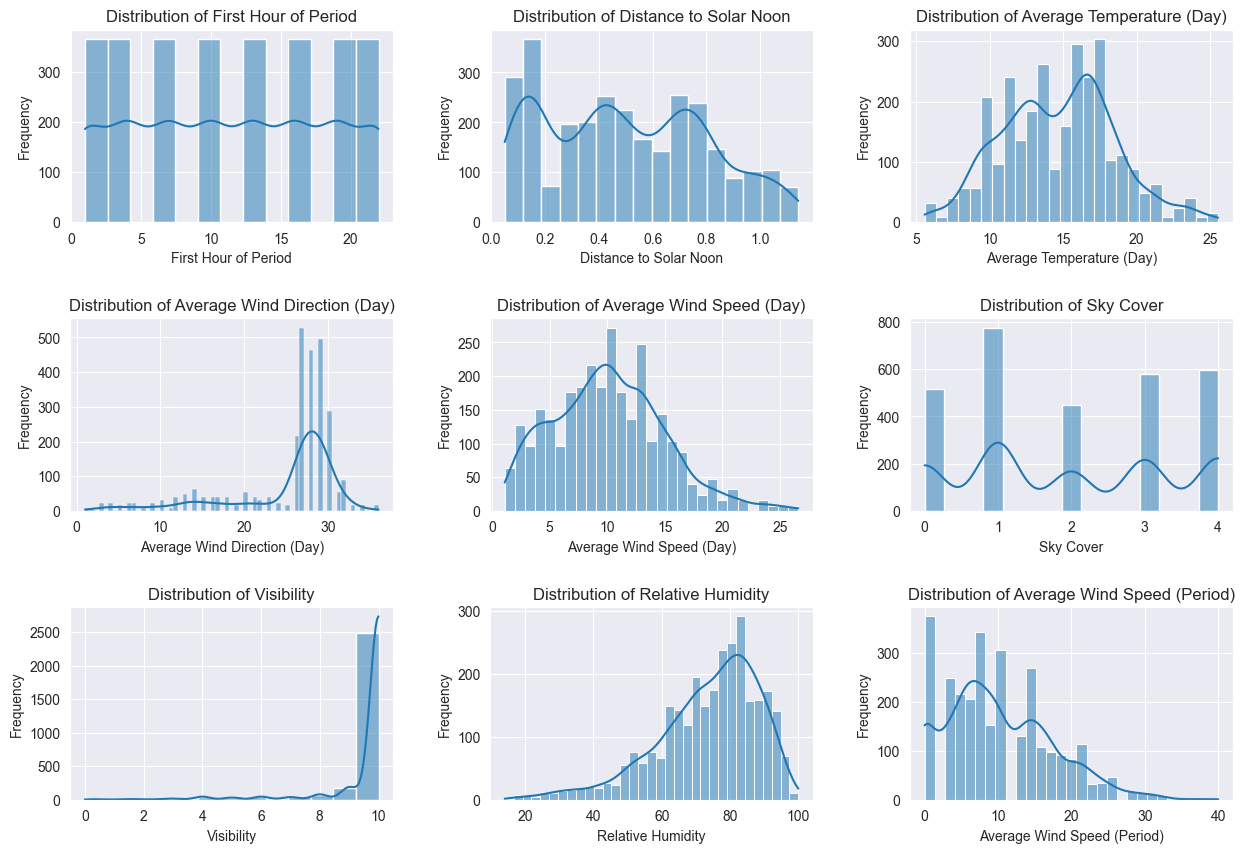

In [18]:
# Plotting the distribution of all main variables
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
cols = df.columns[1:]

for col, ax in zip(cols, axes.flatten()):
    sns.histplot(df[col], ax=ax, kde=True)
    ax.set_title(f'Distribution of {col}')
    ax.set_ylabel('Frequency')

plt.show()


Each subplot shows the distribution of a single variable. We can see that some variables like 'Sky Cover' and 'Visibility' have a discrete distribution, indicating that they have a limited number of distinct values. Others, such as 'Relative Humidity' and 'Average Wind Speed (Period)', show a more continuous distribution.

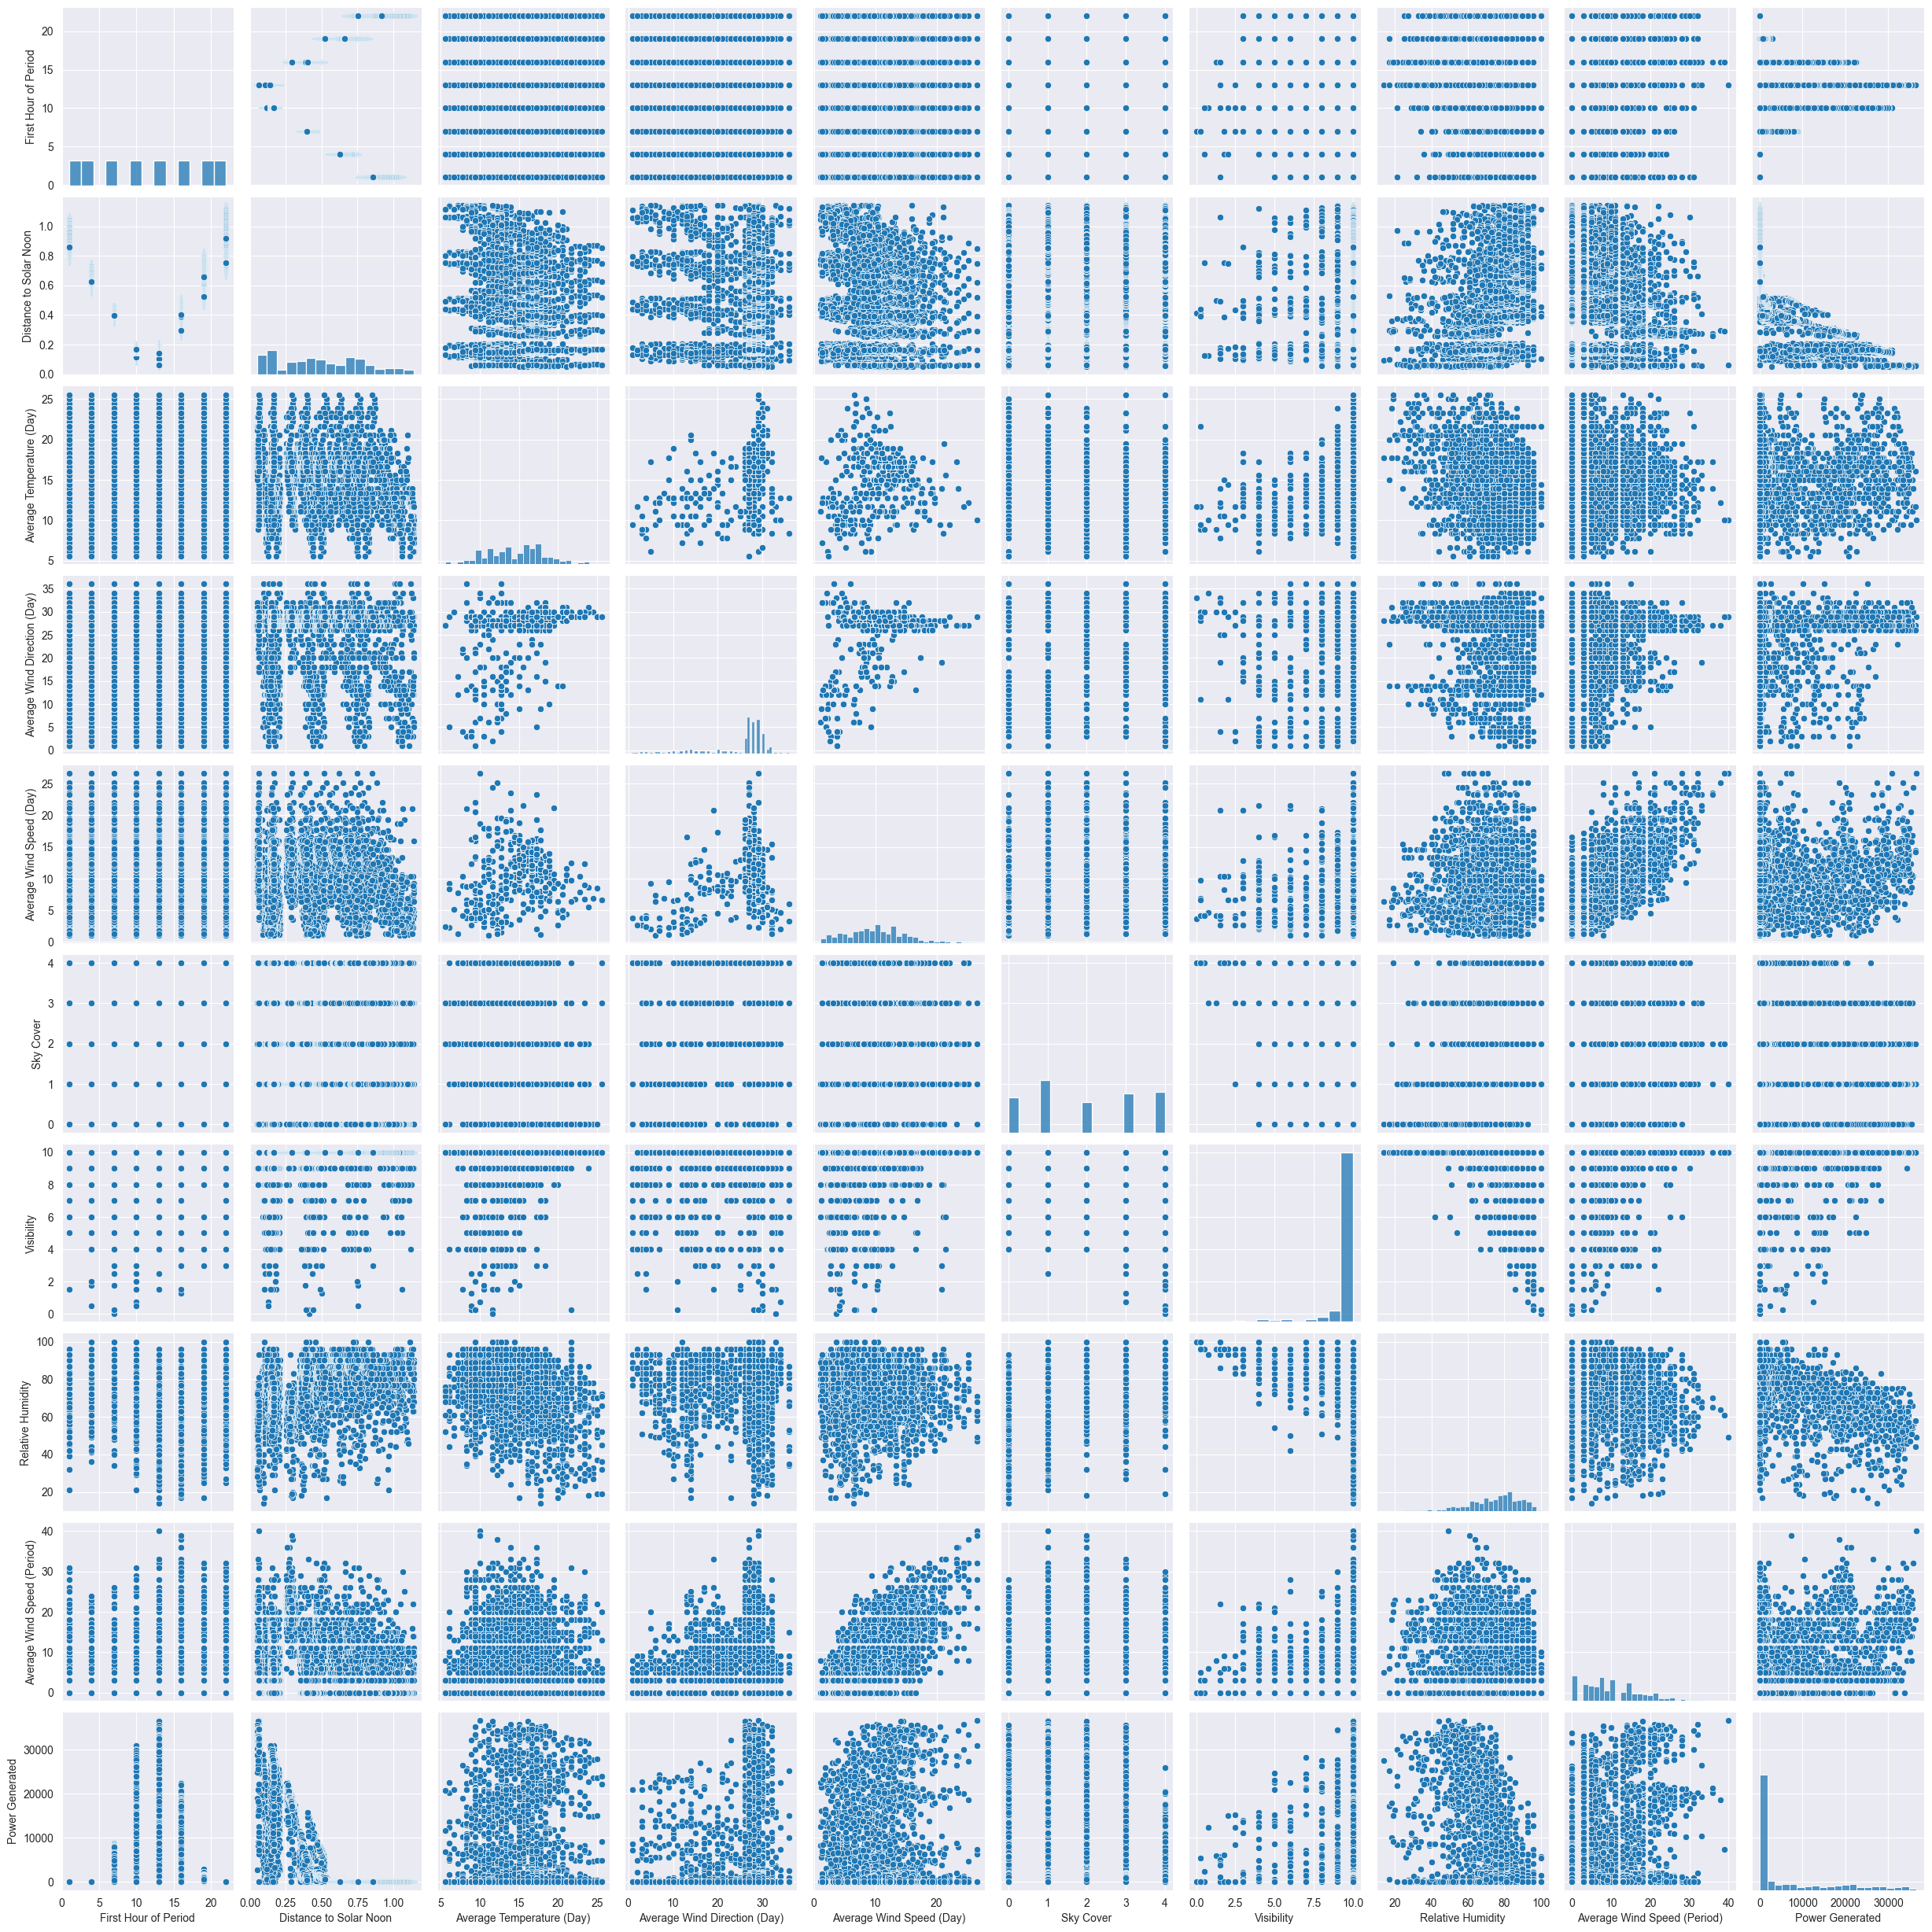

In [19]:
# Pairwise scatter plots
sns.pairplot(df[cols])
plt.show()

These plots are helpful to observe relationships between different variables. For example, there may be a visible correlation between variables like 'Distance to Solar Noon' and 'Power Generated', which would make sense if the power generation is solar-related. Variables such as 'Sky Cover' might also show an inverse relationship with 'Power Generated' due to the impact of cloud cover on solar power generation.

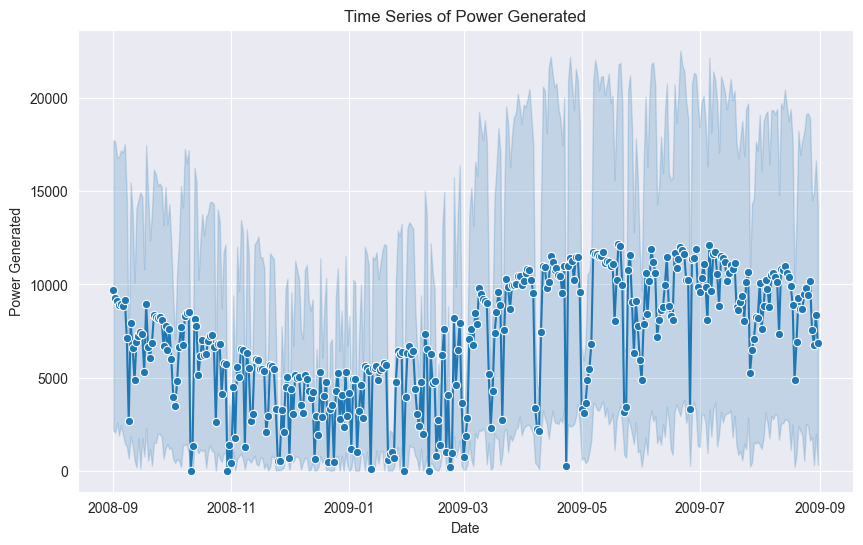

In [20]:
# Time series plot for 'Power Generated'
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Date', y='Power Generated', marker='o')
plt.title('Time Series of Power Generated')
plt.xlabel('Date')
plt.ylabel('Power Generated')
plt.grid(True)
plt.show()

The plot indicates that power generation varies throughout the period, with some peaks that could correspond to specific hours of the day or external factors not visible in this plot. It appears that there's a cyclical pattern which could be daily, suggesting that power generation might be influenced by factors like sunlight hours if it's solar power generation we are looking at.

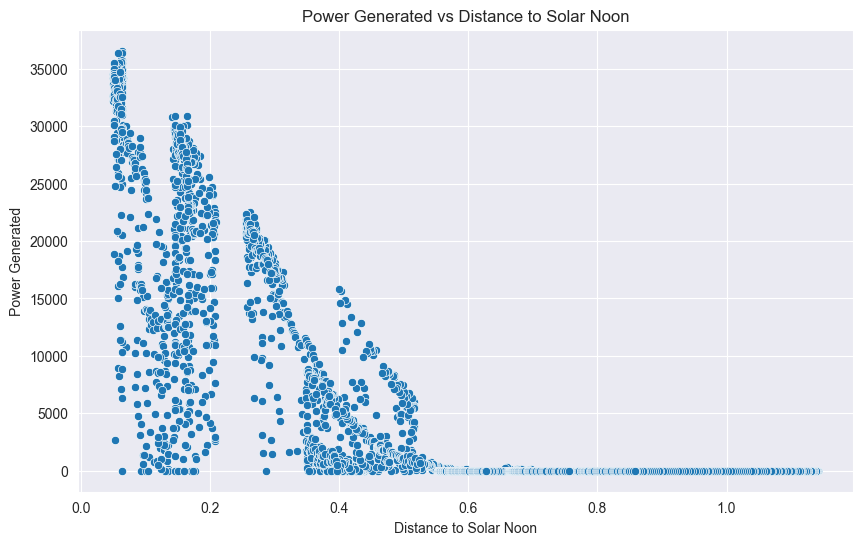

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Distance to Solar Noon', y='Power Generated')
plt.title('Power Generated vs Distance to Solar Noon')
plt.xlabel('Distance to Solar Noon')
plt.ylabel('Power Generated')
plt.grid(True)
plt.show()

According to this graph, we can say that the smaller is the distance to solar noon, the bigger the power generated will be.

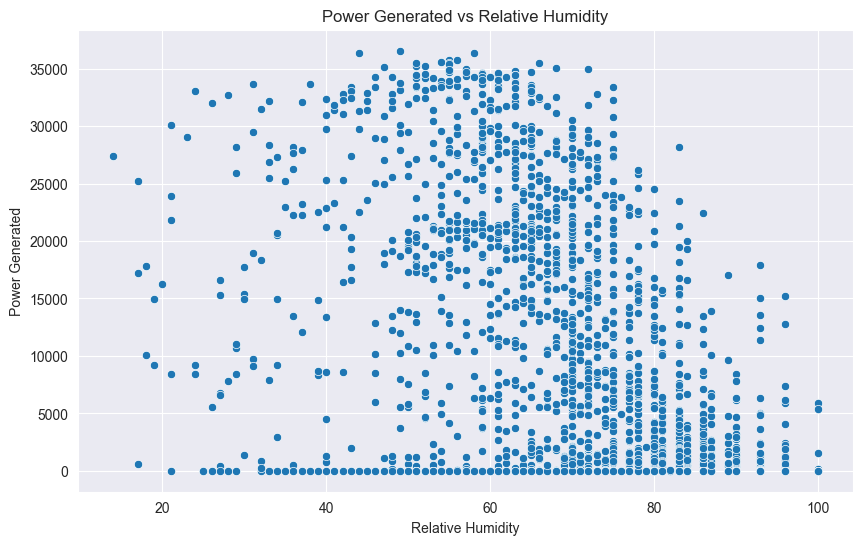

In [22]:
# Scatter plot of 'Power Generated' vs 'Relative Humidity'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Relative Humidity', y='Power Generated')
plt.title('Power Generated vs Relative Humidity')
plt.xlabel('Relative Humidity')
plt.ylabel('Power Generated')
plt.grid(True)
plt.show()

Contrary to the previous graph, there doesn't seem to be much correlation between humidity and power generated. However, if the humidity is very high (>80%), then the power generated is low.

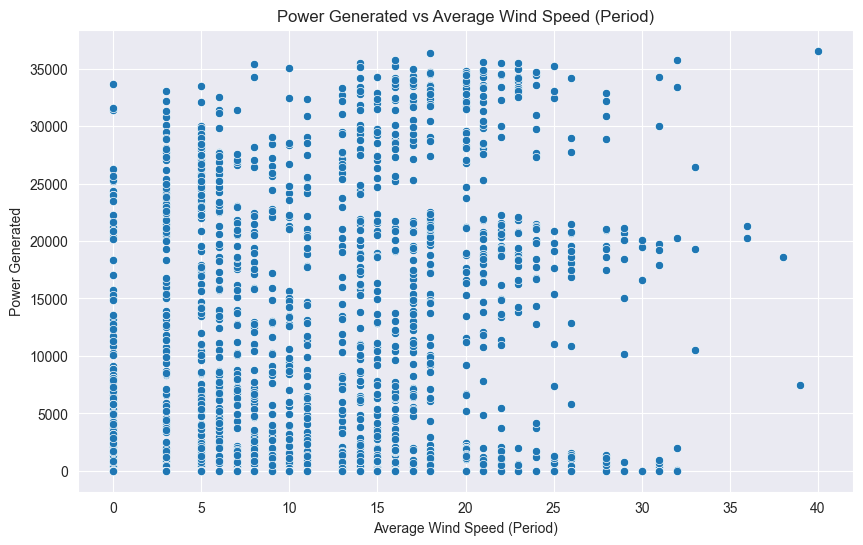

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Average Wind Speed (Period)',y='Power Generated')
plt.title('Power Generated vs Average Wind Speed (Period)')
plt.xlabel('Average Wind Speed (Period)')
plt.ylabel('Power Generated')
plt.grid(True)
plt.show()

At first glance, we can draw the same conclusions from this graph as from the previous one. However, we don't have enough data after 20/25 speeds. As a result, we can't conclude on a true correlation between wind speed and power generated.

<Axes: xlabel='Power Generated'>

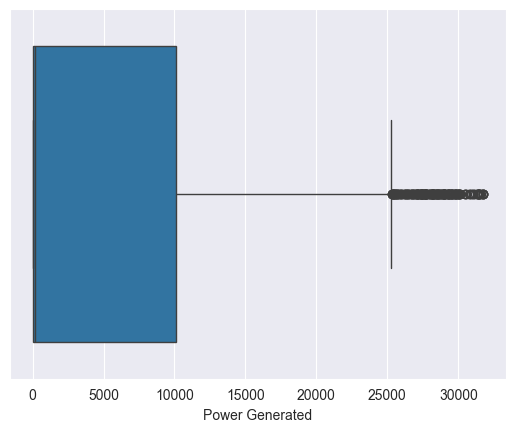

In [45]:
sns.boxplot(data=df, x='Power Generated')
# q1 = df['Power Generated'].quantile(0.25)
# q3 = df['Power Generated'].quantile(0.75)
# iqr = q3 - q1
# uperlimit = q3 + 1.5 * iqr
# lowerlimit = q1 - 1.5 * iqr
# print(f"uperlimit {uperlimit}")
# print(f"lowerlimit {lowerlimit}")
# df = df[df['Power Generated'] < uperlimit]

# Part 3 : Prediction

In [50]:
import pandas as pd
import time
from lazypredict.Supervised import LazyRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [43]:
def convert_to_timestamp(x):
    return time.mktime(x.timetuple())
df['Date'] = df['Date'].apply(convert_to_timestamp)

AttributeError: 'float' object has no attribute 'timetuple'

In [44]:
X = df.drop(columns=['Power Generated'])
y = df['Power Generated']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████| 42/42 [00:09<00:00,  4.31it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 859
[LightGBM] [Info] Number of data points in the train set: 2335, number of used features: 10
[LightGBM] [Info] Start training from score 6938.057816
                               Adjusted R-Squared  R-Squared     RMSE  \
Model                                                                   
GradientBoostingRegressor                    0.93       0.93  2845.95   
LGBMRegressor                                0.92       0.92  2910.49   
HistGradientBoostingRegressor                0.92       0.92  2969.57   
XGBRegressor                                 0.91       0.91  3065.75   
RandomForestRegressor                        0.91       0.91  3126.18   
ExtraTreesRegressor                          0.91       0.91  3137.13   
BaggingRegressor                             0.90       0.90  3239.15   


In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 675 candidates, totalling 3375 fits


KeyboardInterrupt: 

In [ ]:
best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"rmse {rmse}")
print(f"mse {mse}")
print(f"r2 {r2_score(y_test, y_pred)}")

In [46]:
rf2 = RandomForestRegressor(random_state=42)
rf2.fit(X_train, y_train)
y_pred = rf2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"rmse {rmse}")
print(f"mse {mse}")
print(f"r2 {r2_score(y_test, y_pred)}")

rmse 2963.142086216648
mse 8780211.023108348
r2 0.8803247264483667


In [51]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"rmse {rmse}")
print(f"mse {mse}")
print(f"r2 {r2_score(y_test, y_pred)}")

rmse 2801.324705664714
mse 7847420.106567498
r2 0.8930387725925544


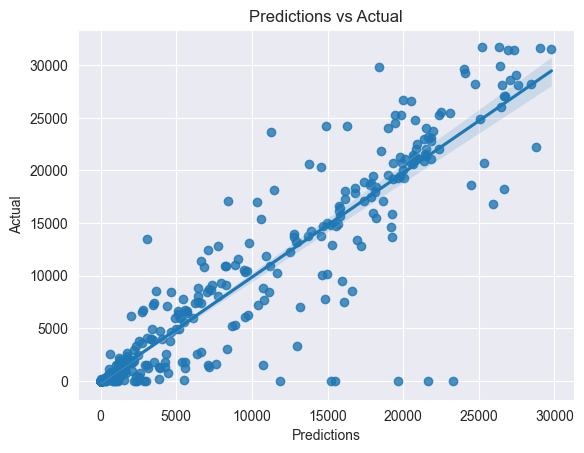

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.regplot(x=y_pred, y=y_test, fit_reg=True)
plt.xlabel("Predictions")
plt.ylabel("Actual")
plt.title("Predictions vs Actual")
plt.show()

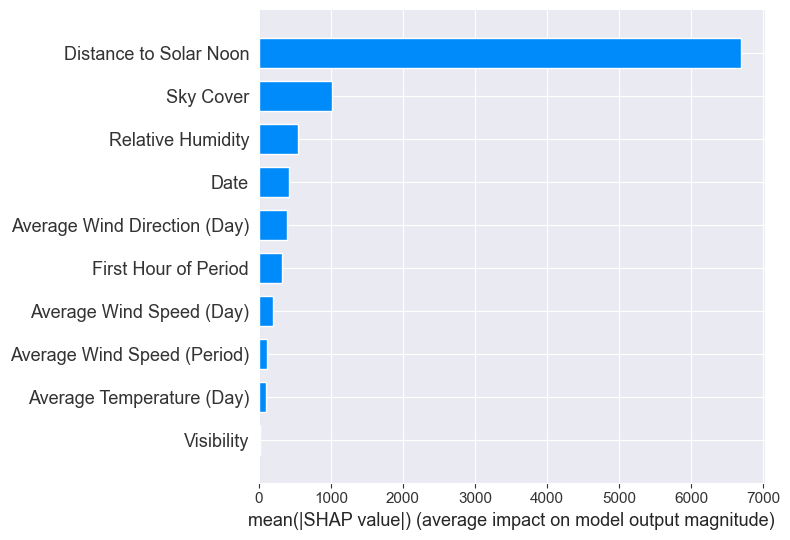

In [48]:
#features importances : shapley values
import shap
explainer = shap.TreeExplainer(rf2)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")